# Titanic: Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>
>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
>
>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
>
>#### Goal
>
>It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
>
>#### Metric
>
>Your score is the percentage of passengers you correctly predict. This is known simply as "[accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)”.

From the competition [homepage](https://www.kaggle.com/c/titanic).

### Goal for this Notebook

### Data
Loading train data with pandas.

In [155]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("data/train.csv")
display(df.head())
display(df.count())
print("DataFrame shape: {}".format(df.shape))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

DataFrame shape: (891, 12)


In [130]:
titanic = df.copy()

# Dropping and removing NaN values
titanic = titanic.drop(['PassengerId','Ticket','Cabin'], axis=1)
titanic = titanic.dropna()

# Transforming categorical values
titanic['Survived'] = titanic['Survived'].map({1: 'Survived', 0: 'Died'})
titanic['Pclass'] = titanic['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

display(titanic.head())
print("DataFrame shape: {}".format(titanic.shape))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,Died,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,Died,Third,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


DataFrame shape: (712, 9)


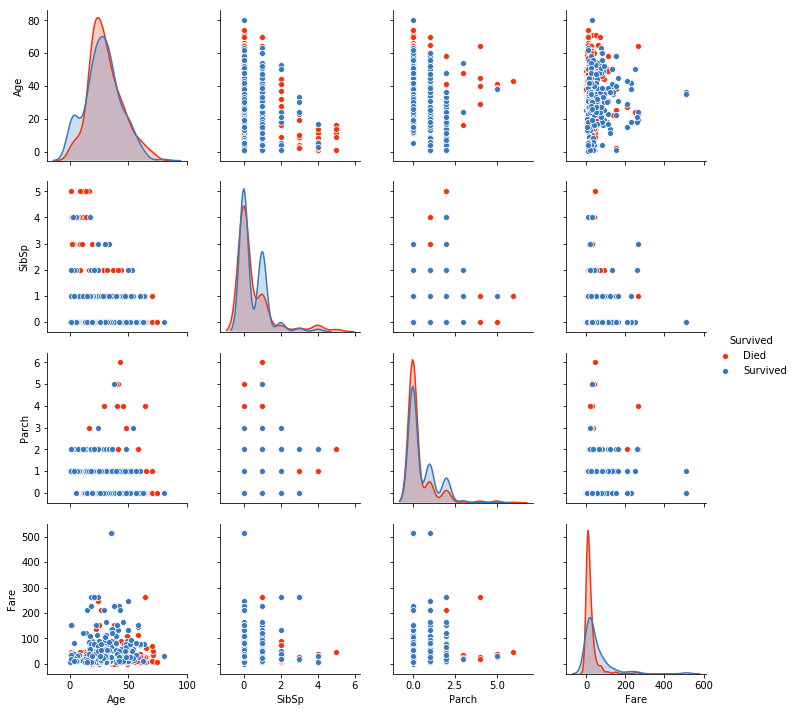

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colors = ["vermillion", "windows blue", "leaf green", "iris", "amber", "greyish"]
sns.set_palette(sns.xkcd_palette(colors))

display(sns.pairplot(titanic, hue='Survived'))

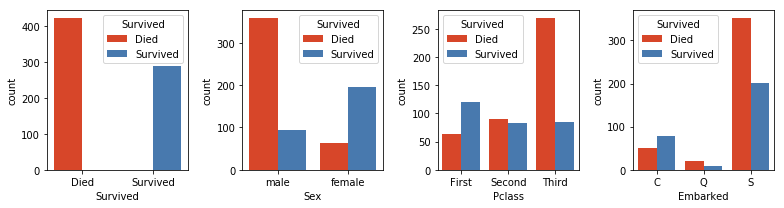

In [132]:
category_label = ['Survived', 'Sex', 'Pclass', 'Embarked']
category_order = [['Died', 'Survived'], ['male', 'female'], 
                  ['First', 'Second', 'Third'], ['C', 'Q', 'S']]

fig, axes = plt.subplots(1, 4, figsize=(11,3))

for ax, x, order in zip(axes, category_label, category_order):
    sns.countplot(x=x, order=order, hue='Survived', data=titanic, ax=ax)

fig.tight_layout()

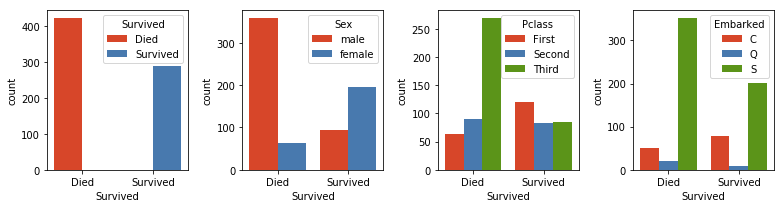

In [133]:
fig, axes = plt.subplots(1, 4, figsize=(11,3))

for ax, x, order in zip(axes, category_label, category_order):
    sns.countplot(x='Survived', hue=x, hue_order=order, data=titanic, ax=ax)

fig.tight_layout()

### Supervised Machine Learning

In [195]:
# module imports
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

# create matrices
#formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)'
#y, X = dmatrices(formula, df, return_type = 'dataframe')

# sklearn output
#model = LogisticRegression(solver='liblinear', fit_intercept = False, C = 1e9)
#mdl = model.fit(X, y.values.ravel())
#display(model.coef_)

# sm
#logit = sm.Logit(y, X)
#results = logit.fit()
#print(results.params)

formulas = ['Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)',
           'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare',
           'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)',
           'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Fare + C(Embarked)',
           'Survived ~ C(Pclass) + C(Sex) + Age + Parch + Fare + C(Embarked)',
           'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)']
models = []

for formula in formulas:
    y, X = dmatrices(formula, df, return_type = 'dataframe')
    logit = sm.Logit(y, X)
    model = logit.fit()
    print('Formula {}\n{}\n'.format(formula, model.params))
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.444060
         Iterations 6
Formula Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)
Intercept           4.432931
C(Pclass)[T.2]     -1.189637
C(Pclass)[T.3]     -2.395220
C(Sex)[T.male]     -2.637859
C(Embarked)[T.Q]   -0.823379
C(Embarked)[T.S]   -0.402848
Age                -0.043308
SibSp              -0.362925
Parch              -0.060365
Fare                0.001451
dtype: float64

Optimization terminated successfully.
         Current function value: 0.445221
         Iterations 6
Formula Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare
Intercept         4.179995
C(Pclass)[T.2]   -1.292538
C(Pclass)[T.3]   -2.501069
C(Sex)[T.male]   -2.637451
Age              -0.044159
SibSp            -0.376847
Parch            -0.061268
Fare              0.002043
dtype: float64

Optimization terminated successfully.
         Current function value: 0.444291
         Iterations 6
Formula 

In [196]:
tdf = pd.read_csv("data/test.csv")
tdf.fillna(tdf.mean(), inplace=True)
tdf['Survived'] = 1.0
display(tdf.head())
print("DataFrame shape: {}".format(tdf.shape))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


DataFrame shape: (418, 12)


In [204]:
for i, (formula, model) in enumerate(zip(formulas, models)):
    yt, Xt = dmatrices(formula, tdf, return_type='dataframe')
    y_pred = model.predict(Xt)
    tdf['Survived'] = y_pred
    tdf = tdf.round({'Survived': 0})
    tdf = tdf.astype({'Survived': int})
    tdf[['PassengerId', 'Survived']].to_csv(
        "data/output/{}logit_regression_submission.csv".format(i), index=False)
    

#yt, Xt = dmatrices(formula, tdf, return_type = 'dataframe')

#y_pred = results.predict(Xt)
#tdf['Survived'] = y_pred
#display(tdf.head())
#print(y_pred)
#df['Survived'] = pd.to_numeric(df['Survived'])
#tdf = tdf.round({'Survived': 0})
#tdf = tdf.astype({'Survived': int})
#display(tdf.head())

#tdf[['PassengerId', 'Survived']].to_csv("data/output/logitregres_submission.csv", index=False)

Your submission scored 0.75119

In [191]:
y_pred2 = mdl.predict(Xt)

tdf['Survived'] = y_pred2
display(tdf.head())
#print(y_pred)
#df['Survived'] = pd.to_numeric(df['Survived'])
#tdf = tdf.round({'Survived': 0})
tdf = tdf.astype({'Survived': int})
display(tdf.head())

tdf[['PassengerId', 'Survived']].to_csv("data/output/logitregres2_submission.csv", index=False)
print(y_pred2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.